In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
def plot(X, pred):
    xsort = X[:, 1].argsort(0)
    sort = X[xsort][:, 0]
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.scatter(bill, tip, color='green')
    ax.plot(sort[:, 1], pred[xsort], color = 'red')
    plt.show

In [3]:
def kernel(X, point, k):
    m, n = X.shape
    W = np.mat(np.eye(m))
    for i in range(m):
        diff = point - X[i]
        W[i, i] = np.exp(diff*diff.T/(-2.0*k**2))
    return W

In [7]:
def localWeight(X, point, mtip, k):
    wei = kernel(X, point, k)
    W = (X.T*(wei*X)).I* (X.T*(wei*mtip.T))
    return W

In [9]:
def localWeightRegression(data, mtip, k):
    m, n = np.shape(data)
    pred = np.zeros(m)
    for i in range(m):
        pred[i] = data[i]*localWeight(data, data[i], mtip, k)
    return pred

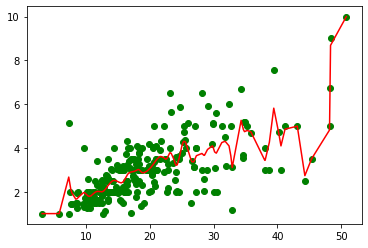

In [16]:
data = pd.read_csv("tips.csv")
bill = np.array(data.total_bill)
tip = np.array(data.tip)

mbill = np.mat(bill)
mtip = np.mat(tip)
m = mbill.shape[1]
ones = np.mat(np.ones(m))
X = np.hstack((ones.T, mbill.T))
pred = localWeightRegression(X, mtip, 0.5)
plot(X, pred)